In [1]:
# if we apply normalize_image_signed before matrix multiplication
# this reproduces "gross features" of softmaxing rows of the left matrix
# and columns of the right matrix before matrix multiplication,
# but this does not reproduce fine-grained features

# joint work with github user 'nekel'

import LinearAlgebra: transpose, norm

function normalize_image(im)
    im_res = im .- minimum(im)
    return (1/maximum(im_res))*im_res
end

function normalize_image_signed(img)
    img1 = img .- minimum(img)
    img2 = (2/maximum(img1))*img1
    return img2 .- 1
end

normalize_image_signed (generic function with 1 method)

In [2]:
import ImageView: imshow
import Images: Gray
import TestImages: testimage
mandrill = 1*Gray.(testimage("mandrill"))
matrix_mandrill = convert(Matrix{Float32}, mandrill)
typeof(matrix_mandrill)

┌ Info: Precompiling ImageView [86fae568-95e7-573e-a6b2-d8a6b900c9ef]
└ @ Base loading.jl:1317
┌ Info: Precompiling TestImages [5e47fb64-e119-507b-a336-dd2b206d9990]
└ @ Base loading.jl:1317


Matrix{Float32} (alias for Array{Float32, 2})

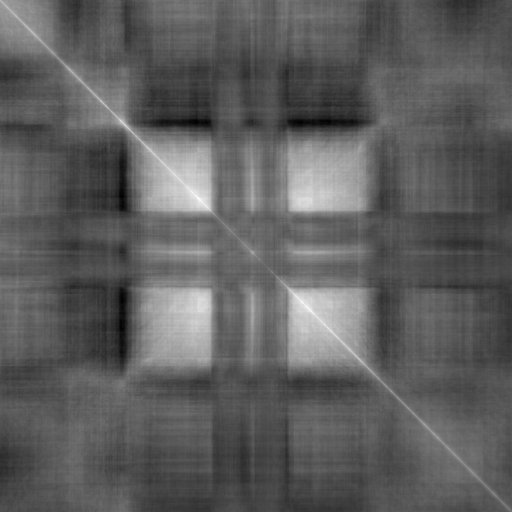

In [3]:
s_mm = normalize_image_signed(matrix_mandrill)
Gray.(normalize_image(transpose(s_mm)*s_mm))

In [4]:
jetplane = 1*Gray.(testimage("jetplane"))
matrix_jetplane = convert(Matrix{Float32}, jetplane)
typeof(matrix_jetplane)

Matrix{Float32} (alias for Array{Float32, 2})

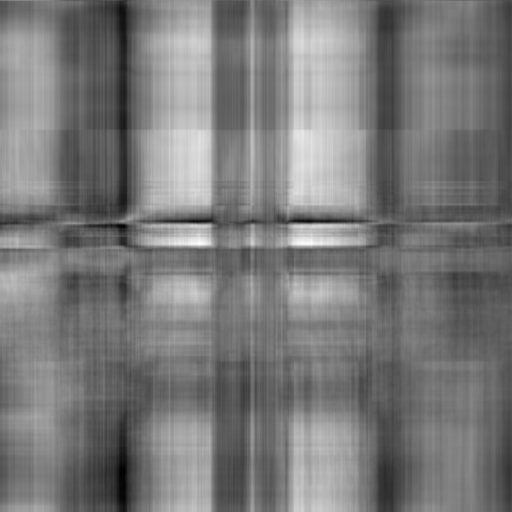

In [5]:
s_mj = normalize_image_signed(matrix_jetplane)
Gray.(normalize_image(s_mj*s_mm))